In [1]:
import matplotlib.pyplot as plt
#%matplotlib widget
import numpy as np
np.random.seed(42)

# Classification

## LDA 
P(X | Y = k) ~ N(mu, Sigma) with covariance matrices equal for all classes $k = 1, \dots K$.

In [2]:
from sklearn.model_selection import train_test_split
from numpy.random import multivariate_normal
# unkorreliert
sigma = np.array([[1, 0], [0, 10]])
mu_1 = [2, 3]
mu_2 = [-4, -1]
x_1 = multivariate_normal(mu_1, sigma, 1000)
x_2 = multivariate_normal(mu_2, sigma, 1000)
K = np.concatenate((np.repeat(-1, 1000), np.repeat(1, 1000)))
X = np.concatenate((x_1, x_2))
X_train, X_test, K_train, K_test = train_test_split(X, K, test_size=1/3)

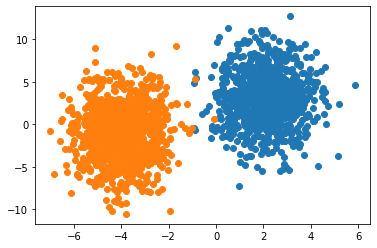

In [3]:
fig = plt.figure()
plt.scatter(x_1[:, 0], x_1[:, 1])
plt.scatter(x_2[:, 0], x_2[:, 1])

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, K_train)
K_pred = LDA.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
# das berechnet wieviele der 2000/3 predictions richtig sind,
# absolut(normlalize = False) oder relativ
accuracy_score(K_test, K_pred, normalize=False)

665

In [6]:
from sklearn.model_selection import cross_validate
LDA = LinearDiscriminantAnalysis()
LDA_cv = cross_validate(LDA, X, K, return_estimator=True)
best_index = np.argmax(LDA_cv['test_score'])

In [7]:
est = LDA_cv['estimator'][best_index]
K_best = est.predict(X_test)
accuracy_score(K_best, K_test)

0.9970014992503748

In [8]:
sigma = np.array([[2, 1.5], [1.5, 3]], dtype=np.float64)
mu_1 = [2, 2]
mu_2 = [-2, -2]
x_1 = multivariate_normal(mu_1, sigma, 1000)
x_2 = multivariate_normal(mu_2, sigma, 1000)
K = np.concatenate((np.repeat(-1, 1000), np.repeat(1, 1000)))
X = np.concatenate((x_1, x_2))
X_train, X_test, K_train, K_test = train_test_split(X, K, test_size=1/3)

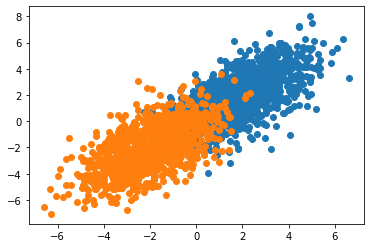

In [9]:
fig = plt.figure()
plt.scatter(x_1[:, 0], x_1[:, 1])
plt.scatter(x_2[:, 0], x_2[:, 1])

In [10]:
LDA = LinearDiscriminantAnalysis()
LDA_cv = cross_validate(LDA, X, K, return_estimator=True)
best_index = np.argmax(LDA_cv['test_score'])
# das ist nicht immer der beste schaetzer, wie kann man das noch besser machen?
est = LDA_cv['estimator'][best_index]
K_best = est.predict(X_test)
accuracy_score(K_best, K_test)

0.9355322338830585

## QDA

In [11]:
sigma_1 = np.array([[2, 1.5], [1.5, 3]], dtype=np.float64)
sigma_2 = np.array([[1, 0], [0, 2]], dtype=np.float64)
mu_1 = [2, 2]
mu_2 = [-2, -2]
x_1 = multivariate_normal(mu_1, sigma_1, 1000)
x_2 = multivariate_normal(mu_2, sigma_2, 1000)
K = np.concatenate((np.repeat(-1, 1000), np.repeat(1, 1000)))
X = np.concatenate((x_1, x_2))
# wenn man das so macht und der einfach das letzte drittel ohne shuffeling
# nimmt, dann ergibt das keinen sinn train test split shuffelt standardmäßig!
X_train, X_test, K_train, K_test = train_test_split(X, K, test_size=1/3)

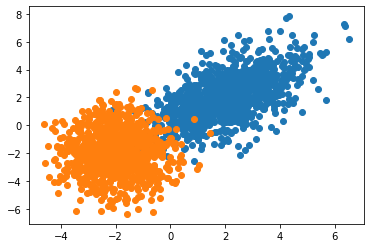

In [12]:
fig = plt.figure()
plt.scatter(x_1[:, 0], x_1[:, 1])
plt.scatter(x_2[:, 0], x_2[:, 1])

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA_cv = cross_validate(QDA, X, K, return_estimator=True)
best_index = np.argmax(QDA_cv['test_score'])

In [14]:
est = QDA_cv['estimator'][best_index]
K_best = est.predict(X_test)
accuracy_score(K_best, K_test)

0.967016491754123

## Logistic Regression

In [15]:
sigma = np.array([[1, 0], [0, 10]])
mu_1 = [2, 3]
mu_2 = [-4, -1]
x_1 = multivariate_normal(mu_1, sigma, 1000)
x_2 = multivariate_normal(mu_2, sigma, 1000)
K = np.concatenate((np.repeat(-1, 1000), np.repeat(1, 1000)))
X = np.concatenate((x_1, x_2))
X_train, X_test, K_train, K_test = train_test_split(X, K, test_size=1/3)

In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, K_train)
K_pred = LR.predict(X_test)
accuracy_score(K_pred, K_test)

0.9985007496251874

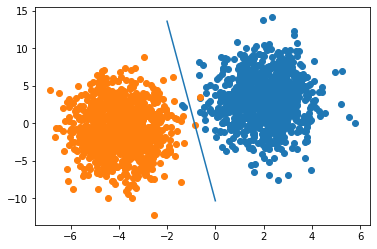

In [17]:
x = np.linspace(-2, 0, 1000)
fig = plt.figure()
plt.scatter(x_1[:, 0], x_1[:, 1])
plt.scatter(x_2[:, 0], x_2[:, 1])
plt.plot(x, 1/LR.coef_[0][1] * (-LR.intercept_ - LR.coef_[0][0] * x))

In [18]:
sigma_1 = np.array([[2, 1.5], [1.5, 3]], dtype=np.float64)
sigma_2 = np.array([[1, 0], [0, 2]], dtype=np.float64)
mu_1 = [2, 2]
mu_2 = [-2, -2]
x_1 = multivariate_normal(mu_1, sigma_1, 1000)
x_2 = multivariate_normal(mu_2, sigma_2, 1000)
K = np.concatenate((np.repeat(-1, 1000), np.repeat(1, 1000)))
X = np.concatenate((x_1, x_2))
# wenn man das so macht und der einfach das letzte drittel ohne shuffeling
# nimmt, dann ergibt das keinen sinn train test split shuffelt standardmäßig!
X_train, X_test, K_train, K_test = train_test_split(X, K, test_size=1/3)

In [19]:
LR = LogisticRegression()
LR.fit(X_train, K_train)
K_pred = LR.predict(X_test)
accuracy_score(K_pred, K_test)

0.974512743628186

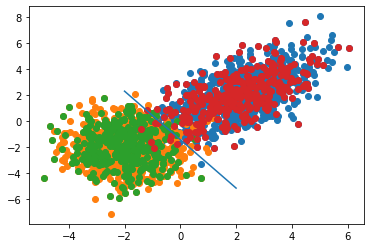

In [20]:
x = np.linspace(-2, 2, 2000)
fig = plt.figure()
plt.scatter(x_1[:, 0], x_1[:, 1])
plt.scatter(x_2[:, 0], x_2[:, 1])
plt.scatter(X_test[K_test == 1, 0], X_test[K_test == 1, 1])
plt.scatter(X_test[K_test == -1, 0], X_test[K_test == -1, 1])
plt.plot(x, 1/LR.coef_[0][1] * (-LR.intercept_ - LR.coef_[0][0] * x))

In [21]:
LR = LogisticRegression()
LR_cv = cross_validate(LR, X, K, return_estimator=True)
best_index = np.argmax(LR_cv['test_score'])

In [22]:
est = LR_cv['estimator'][best_index]
K_best = est.predict(X_test)
accuracy_score(K_best, K_test)

0.9760119940029985

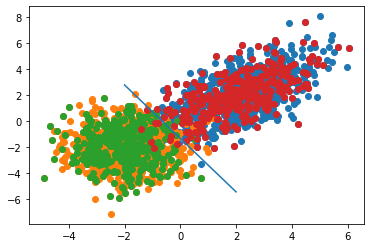

In [23]:
x = np.linspace(-2, 2, 2000)
fig = plt.figure()
plt.scatter(x_1[:, 0], x_1[:, 1])
plt.scatter(x_2[:, 0], x_2[:, 1])
plt.scatter(X_test[K_test == 1, 0], X_test[K_test == 1, 1])
plt.scatter(X_test[K_test == -1, 0], X_test[K_test == -1, 1])
plt.plot(x, 1/est.coef_[0][1] * (-est.intercept_ - est.coef_[0][0] * x))

# SVM